# Perkenalan

Perkenalkan nama saya Wildan Abdurrasyid seorang Mahasiswa sem 3 Institut Teknologi Tangerang Selatan.

pada proyek ini saya akan membuat Model NLP (Natural Language processing) sederhana dari dataset yang telah saya dapatkan.

link source dataset: https://www.kaggle.com/datasets/athu1105/book-genre-prediction

## Import Library

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Memuat **data**

In [85]:
df = pd.read_csv('data.csv')
df = df.drop(columns=['index', 'title'])
df.head()

,genre,summary
0,fantasy,Drowned Wednesday is the first Trustee among ...
1,fantasy,"As the book opens, Jason awakens on a school ..."
2,fantasy,Cugel is easily persuaded by the merchant Fia...
3,fantasy,The book opens with Herald-Mage Vanyel return...
4,fantasy,Taran and Gurgi have returned to Caer Dallben...


## one-hot-encoding dan membuat dataframe baru.

In [86]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,summary,crime,fantasy,history,horror,psychology,romance,science,sports,thriller,travel
0,Drowned Wednesday is the first Trustee among ...,0,1,0,0,0,0,0,0,0,0
1,"As the book opens, Jason awakens on a school ...",0,1,0,0,0,0,0,0,0,0
2,Cugel is easily persuaded by the merchant Fia...,0,1,0,0,0,0,0,0,0,0
3,The book opens with Herald-Mage Vanyel return...,0,1,0,0,0,0,0,0,0,0
4,Taran and Gurgi have returned to Caer Dallben...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4652,"Atticus O’Sullivan, last of the Druids, lives ...",0,1,0,0,0,0,0,0,0,0
4653,Charlie Bucket's wonderful adventure begins wh...,0,1,0,0,0,0,0,0,0,0
4654,"""I live for the dream that my children will be...",0,1,0,0,0,0,0,0,0,0
4655,"Rose loves Dimitri, Dimitri might love Tasha, ...",0,1,0,0,0,0,0,0,0,0


mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array

In [87]:
text_column = 'summary'
genre_columns = ['crime', 'fantasy', 'history', 'horror', 'psychology', 'romance', 'science', 'sports', 'thriller', 'travel']
sinopsis = df_baru[text_column].values
label = df_baru[genre_columns].values

## Pembagian Data Training dan Testing

In [88]:
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

##  Tokenisasi

In [89]:
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(sinopsis_latih)

sequences_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sequences_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sequences_latih, padding='post', maxlen=5, truncating='post')
padded_test = pad_sequences(sequences_test, padding='post', maxlen=5, truncating='post')


## Modelling dan Compile

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(genre_columns), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fungsi Callbacks

In [91]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9:
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True

callbacks = myCallback()

## Latih Data dengan Callbacks

In [92]:
num_epochs = 300
history = model.fit(padded_latih, label_latih, epochs=num_epochs, validation_data=(padded_test, label_test), callbacks=[callbacks], verbose=2)

Epoch 1/300
117/117 - 5s - loss: 2.1373 - accuracy: 0.1887 - val_loss: 2.0538 - val_accuracy: 0.2167 - 5s/epoch - 40ms/step
Epoch 2/300
117/117 - 1s - loss: 2.0358 - accuracy: 0.2086 - val_loss: 2.0300 - val_accuracy: 0.2167 - 814ms/epoch - 7ms/step
Epoch 3/300
117/117 - 1s - loss: 1.9661 - accuracy: 0.2169 - val_loss: 2.0328 - val_accuracy: 0.2275 - 875ms/epoch - 7ms/step
Epoch 4/300
117/117 - 1s - loss: 1.8595 - accuracy: 0.2609 - val_loss: 2.0788 - val_accuracy: 0.2361 - 805ms/epoch - 7ms/step
Epoch 5/300
117/117 - 1s - loss: 1.7231 - accuracy: 0.3232 - val_loss: 2.1715 - val_accuracy: 0.2157 - 879ms/epoch - 8ms/step
Epoch 6/300
117/117 - 1s - loss: 1.6176 - accuracy: 0.3772 - val_loss: 2.1884 - val_accuracy: 0.2124 - 891ms/epoch - 8ms/step
Epoch 7/300
117/117 - 1s - loss: 1.5115 - accuracy: 0.4252 - val_loss: 2.3904 - val_accuracy: 0.2135 - 896ms/epoch - 8ms/step
Epoch 8/300
117/117 - 1s - loss: 1.4135 - accuracy: 0.4663 - val_loss: 2.5699 - val_accuracy: 0.1996 - 890ms/epoch - 8ms

## Evaluate accuracy

In [93]:
train_accuracy = model.evaluate(padded_latih, label_latih, verbose=0)[1]
test_accuracy = model.evaluate(padded_test, label_test, verbose=0)[1]

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 92.11%
Test Accuracy: 22.21%


## Plot loss and accuracy

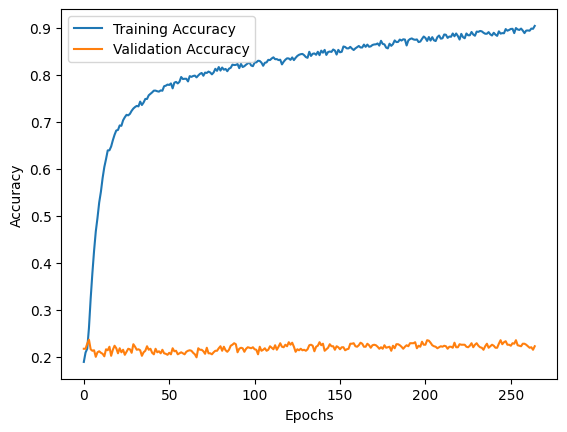

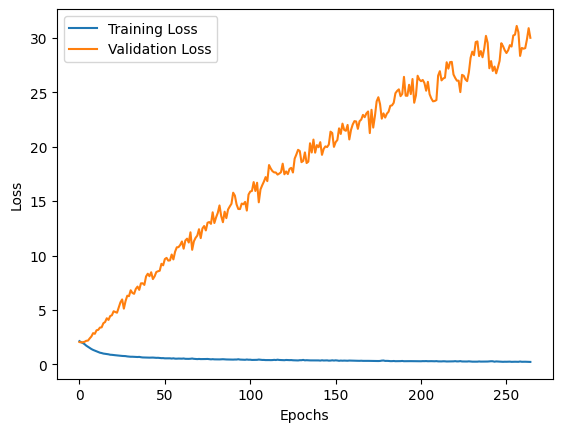

In [94]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saya persembahkan hasil NLP yang telah saya terapkan, Sekian dari saya terima kasih